## Overview of the dataset

Reading and visualizing a single sample:


In [24]:
#imports and global variables
import numpy as np
import os
import csv
import pandas as pd
import random
from scipy import stats
from scipy.signal import find_peaks
import json
samples_driving = 2162
samples_sleeping = 2208
samples_watching_tv = 2212

driving_path = './Dataset/driving'
sleeping_path = './Dataset/sleeping'
watching_tv_path = './Dataset/watching_tv'

Sample User Characteristics:
User Id: 2
User Age: 19
User lifesytle: Sedentary
Phone position: Pants Pockets
accelerometer
gyroscope
location
magnetometer
sound


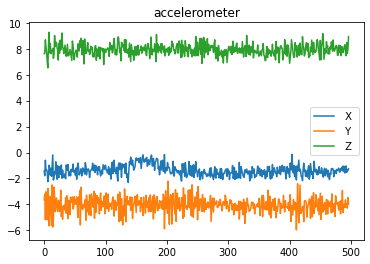

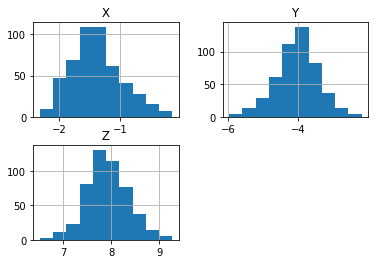

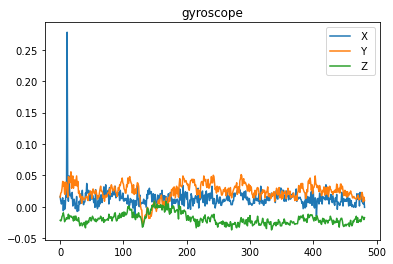

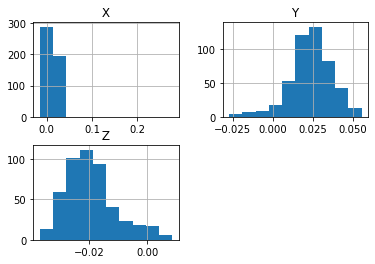

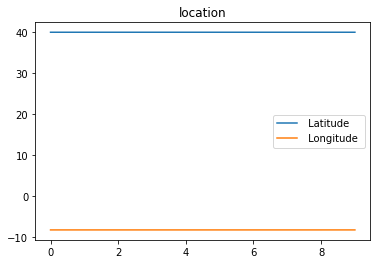

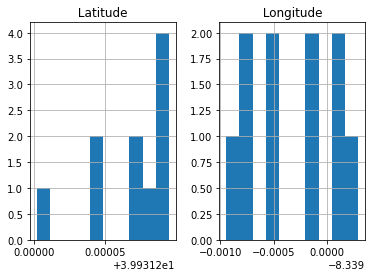

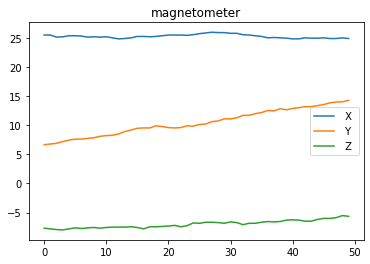

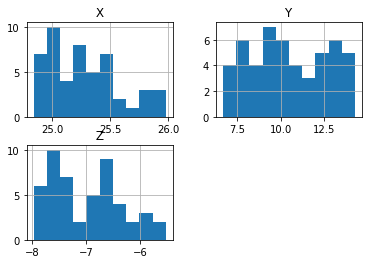

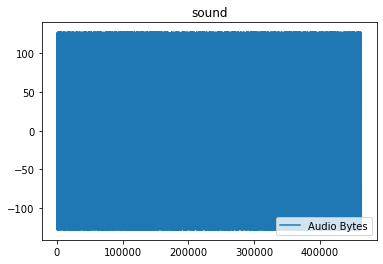

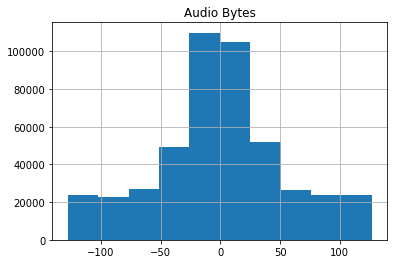

In [25]:
#read all files for random sample and print info
a = random.randint(1,samples_driving)
sample_path = os.path.join(driving_path,str(a))
json_path = os.path.join(sample_path,'data.json')
#read data and visualize
with open(json_path, 'r') as f:
    sample_data =  json.load(f)
    user_id = sample_data['user_id']
    user_age = sample_data['user_age']
    user_lifestyle = sample_data['user_lifestyle']
    mobile_position = sample_data['mobile_device_position']
    sensors = sample_data['sensors']['name']
    print("Sample User Characteristics:")
    print("User Id:",user_id)
    print("User Age:",user_age)
    print("User lifesytle:",user_lifestyle)
    print("Phone position:",mobile_position)
    for file in sensors:
        print(file)
        df = pd.read_csv(os.path.join(sample_path,file+".txt"),'\t')
        if(len(df.columns)>1):
            df = df.iloc[:,1:]
        df.plot(title=file)
        df.hist()

Extracting features from accelerometer data:

In [26]:
#reading all data
sample_list_count = [samples_driving,samples_sleeping,samples_watching_tv]
paths = [driving_path,sleeping_path,watching_tv_path]
alllabels = ['driving','sleeping','watching_tv']
x_values = []
y_values = []
z_values = []
labels = []
print("Reading data...")
for i in range(len(sample_list_count)):
    print("Reading"+paths[i])
    path = paths[i]
    label = alllabels[i]
    for sample in range(sample_list_count[i]):
        if sample==0:
            continue
        sample_path = os.path.join(path,str(sample))
        if not os.path.isdir(sample_path):
            continue
        with open(os.path.join(sample_path,'data.json'),'r') as f:
            sample_data =  json.load(f)
#         user_id = sample_data['user_id']
#         user_age = sample_data['user_age']
#         user_lifestyle = sample_data['user_lifestyle']
#         mobile_position = sample_data['mobile_device_position']
        df = pd.read_csv(os.path.join(sample_path,"accelerometer.txt"),'\t')
        x_values.append(df[' X '])
        y_values.append(df[' Y '])
        z_values.append(df[' Z '])
        labels.append(label)
print('Calculating features...')        
df_new = pd.DataFrame()
df_new['label'] = pd.Series(labels)
#means
df_new['meanX'] = pd.Series(x_values).apply(lambda x: x.mean())
df_new['meanY'] = pd.Series(y_values).apply(lambda x: x.mean())
df_new['meanZ'] = pd.Series(z_values).apply(lambda x: x.mean())
#stdev
df_new['stddevX'] = pd.Series(x_values).apply(lambda x: x.std())
df_new['stddevY'] = pd.Series(y_values).apply(lambda x: x.std())
df_new['stddevZ'] = pd.Series(z_values).apply(lambda x: x.std())
#average abs diff mean
df_new['aadmX'] = pd.Series(x_values).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
df_new['aadmY'] = pd.Series(y_values).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
df_new['aadmZ'] = pd.Series(z_values).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
#min
df_new['minX'] = pd.Series(x_values).apply(lambda x: x.min())
df_new['minY'] = pd.Series(y_values).apply(lambda x: x.min())
df_new['minZ'] = pd.Series(z_values).apply(lambda x: x.min())
#max
df_new['maxX'] = pd.Series(x_values).apply(lambda x: x.max())
df_new['maxY'] = pd.Series(y_values).apply(lambda x: x.max())
df_new['maxZ'] = pd.Series(z_values).apply(lambda x: x.max())
#max-min
df_new['maxminX'] = pd.Series(x_values).apply(lambda x: x.max()-x.min())
df_new['maxminY'] = pd.Series(y_values).apply(lambda x: x.max()-x.min())
df_new['maxminZ'] = pd.Series(z_values).apply(lambda x: x.max()-x.min())
#median
df_new['medX'] = pd.Series(x_values).apply(lambda x: np.median(x))
df_new['medY'] = pd.Series(y_values).apply(lambda x: np.median(x))
df_new['medZ'] = pd.Series(z_values).apply(lambda x: np.median(x))
#kurtosis
df_new['kurtX'] = pd.Series(x_values).apply(lambda x: stats.kurtosis(x))
df_new['kurtY'] = pd.Series(y_values).apply(lambda x: stats.kurtosis(x))
df_new['kurtZ'] = pd.Series(z_values).apply(lambda x: stats.kurtosis(x))
#skewness
df_new['skewX'] = pd.Series(x_values).apply(lambda x: stats.skew(x))
df_new['skewY'] = pd.Series(y_values).apply(lambda x: stats.skew(x))
df_new['skewZ'] = pd.Series(z_values).apply(lambda x: stats.skew(x))

print(df_new.head())

Reading data...
Reading./Dataset/driving
Reading./Dataset/sleeping
Reading./Dataset/watching_tv
Calculating features...
     label     meanX     meanY      meanZ   stddevX   stddevY   stddevZ  \
0  driving  1.296465 -1.352851  10.379128  0.113335  0.140935  0.114491   
1  driving  2.410300 -1.390200   9.869700  2.628697  0.660814  0.912281   
2  driving  1.601000 -1.144900  10.132200  1.539638  0.629815  1.485222   
3  driving  2.311500 -1.018400  10.125300  0.712549  0.195077  0.426559   
4  driving  2.472200 -0.803100  10.121600  1.241059  0.452486  1.284166   

      aadmX     aadmY     aadmZ  ...  maxminZ    medX    medY     medZ  \
0  0.090304  0.115151  0.092717  ...    0.900  1.2875 -1.3400  10.3810   
1  2.351100  0.564560  0.695500  ...    3.132  2.5040 -1.5700   9.8635   
2  1.269200  0.440500  1.294800  ...    4.338  2.4035 -1.1775   9.7250   
3  0.547900  0.157000  0.308640  ...    1.465  2.3170 -1.0100  10.2275   
4  0.969200  0.324860  0.954800  ...    4.569  2.3555 -0.85

Visualizing feature data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254C275DD30>,
      dtype=object)

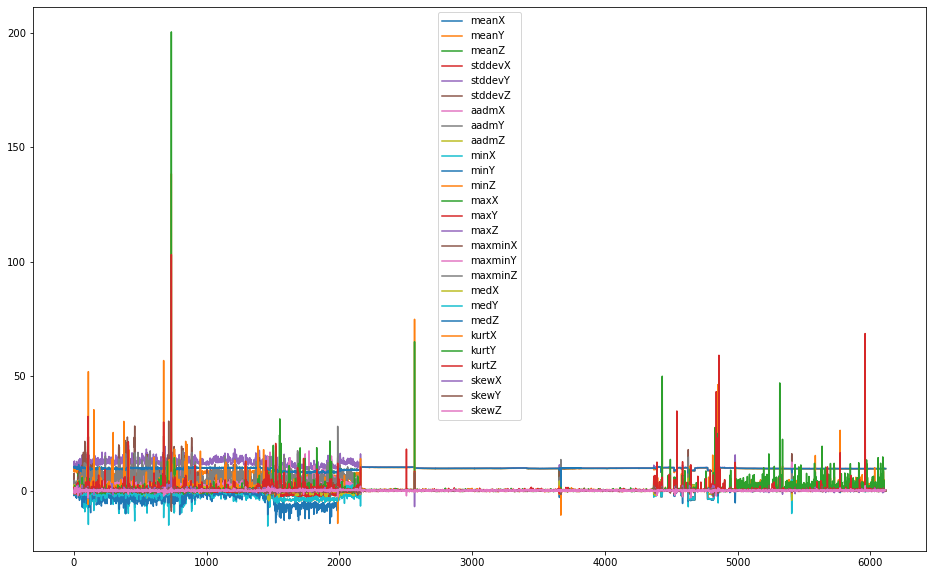

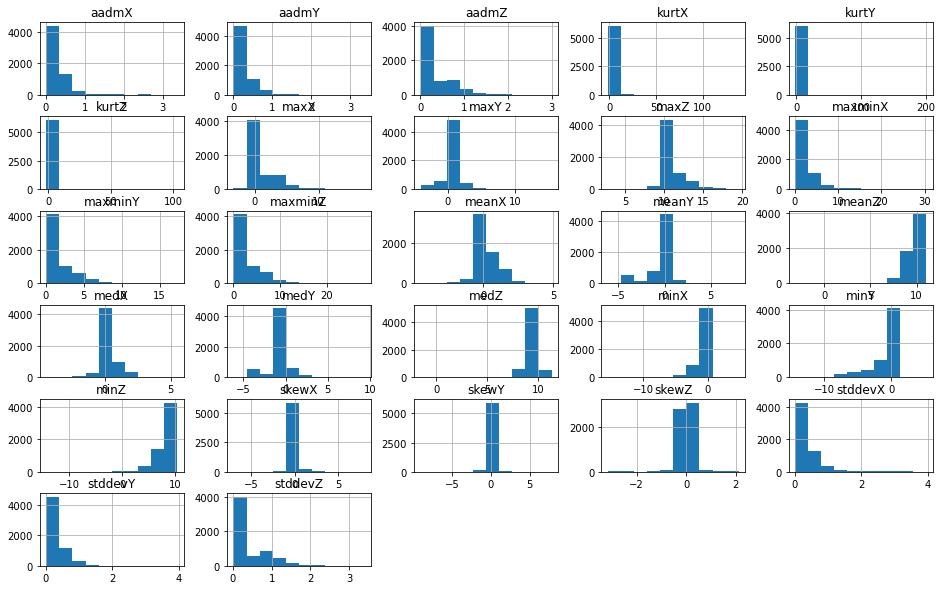

In [27]:
df_new.plot(figsize=(16,10))
df_new.hist(figsize=(16,10))

Classification on accelerometer features:

In [35]:
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn

train, test = train_test_split(df_new, test_size=0.3)

X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

#Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Classifier comparison


........ Score and Classification Report for Nearest Neighbors .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



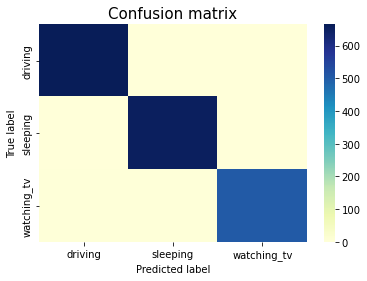


........ Score and Classification Report for Linear SVM .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



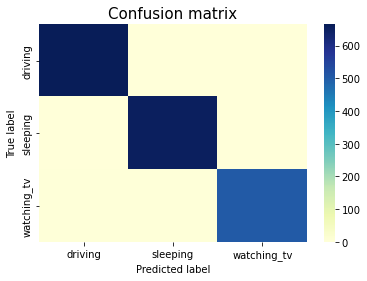


........ Score and Classification Report for RBF SVM .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



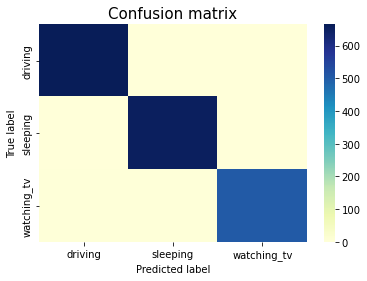


........ Score and Classification Report for Decision Tree .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



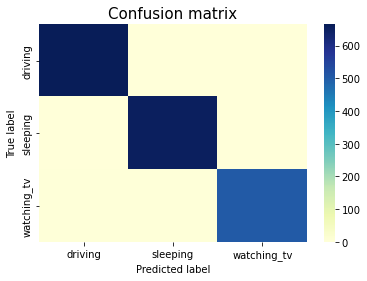


........ Score and Classification Report for Random Forest .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



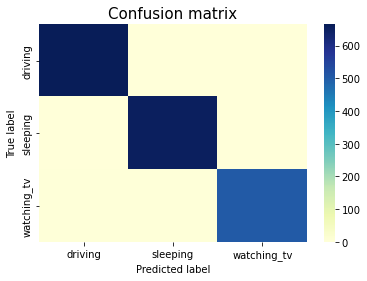


........ Score and Classification Report for Neural Net .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



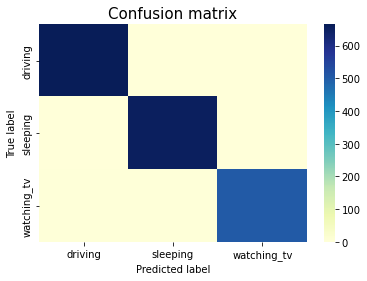


........ Score and Classification Report for AdaBoost .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



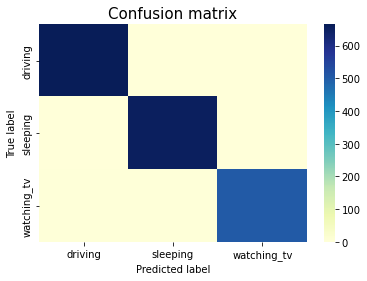


........ Score and Classification Report for Naive Bayes .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



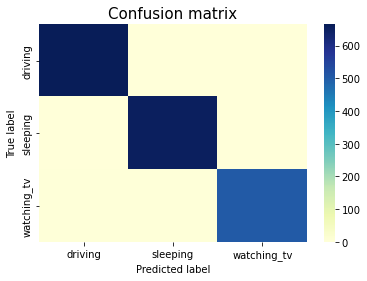

c:\users\petre\appdata\local\programs\python\python38\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



........ Score and Classification Report for QDA .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



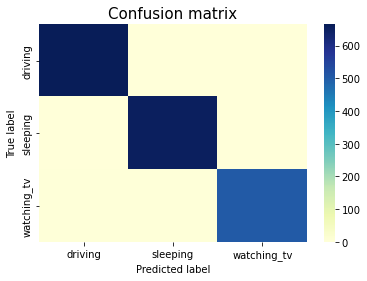

c:\users\petre\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

........ Score and Classification Report for XGBoost .............

              precision    recall  f1-score   support

     driving       0.99      1.00      1.00       666
    sleeping       1.00      1.00      1.00       657
 watching_tv       1.00      0.99      0.99       512

    accuracy                           1.00      1835
   macro avg       1.00      0.99      0.99      1835
weighted avg       1.00      1.00      1.00      1835



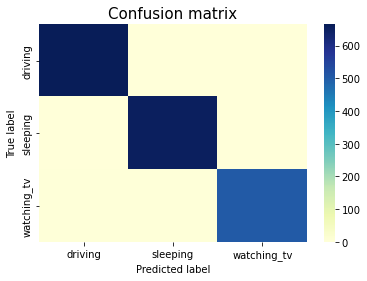

|       Classifier        |          Score          |
------------------------------------------------------
|    Nearest Neighbors    |   0.9553133514986376    |
|       Linear SVM        |    0.817983651226158    |
|         RBF SVM         |   0.9542234332425068    |
|      Decision Tree      |    0.973841961852861    |
|      Random Forest      |    0.955858310626703    |
|       Neural Net        |   0.9209809264305178    |
|        AdaBoost         |   0.6310626702997275    |
|       Naive Bayes       |   0.7918256130790191    |
|           QDA           |   0.9237057220708447    |
|         XGBoost         |   0.9956403269754769    |


In [50]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "XGBoost"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    xgb.XGBClassifier()
]
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print('\n........ Score and Classification Report for {0} .............\n'.format(name))
    scores.append(score)
    print(classification_report(test_labels, y_pred))

    cfm1 = confusion_matrix(test_labels, y_pred)
    seaborn.heatmap(cfm1, xticklabels=alllabels, yticklabels=alllabels,cmap = 'YlGnBu')
    plt.title('Confusion matrix', fontsize = 15)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
print("|{0:^25}|{1:^25}|".format("Classifier","Score"))
print("------------------------------------------------------")
for name,score in zip(names,scores):
    print("|{0:^25}|{1:^25}|".format(name,score))
